<a href="https://colab.research.google.com/github/RanveerVaru/MultiClassClassificationCNN/blob/main/MultiClassImgClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10 #CIFAR-10 dataset, which contains 60,000 images (32x32 pixels) of 10 classes (airplanes, cars, cats, dogs, etc.).
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Used for image augmentation (creating new images by rotating, flipping, etc.).
from keras.models import Sequential #Helps in building sequential models (layer-by-layer deep learning models).
from keras.layers import Dense, Dropout, Activation, Flatten
#Dense → Fully connected layer (used in MLP, CNN).
#Dropout → Reduces overfitting by randomly removing neurons during training.
#Activation → Applies activation functions like ReLU, Softmax, etc.
#Flatten → Converts multi-dimensional data into a 1D array (useful before feeding into dense
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D, GlobalMaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix #Used to evaluate the model's performance by showing true positives, false positives, etc.

In [ ]:
batch_size = 32
num_classes = 10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes) #OHE - [1,0,0] , [0,1,0] , ...
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(50000, 10)

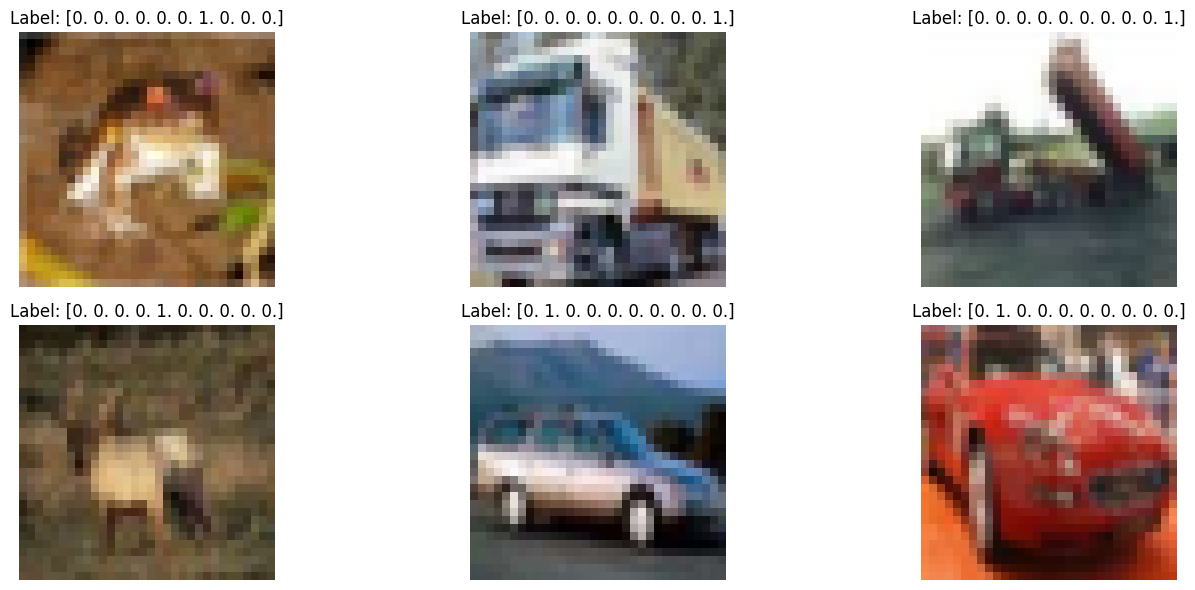

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

axes = axes.flatten()
for i in range(6):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model = Sequential()

# Convolutional layer with 32 filters, each of size 3x3
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
# ReLU activation function
model.add(Activation('relu'))
# Batch normalization layer
model.add(BatchNormalization())


# Conv2D(32, (3,3)) → Adds a 2D convolutional layer with:
# 32 → Number of filters/kernels (these detect features like edges, shapes, etc.).
# (3,3) → Kernel size (each filter is a 3x3 matrix).
# Each filter slides over the image to extract features.
# kernel_initializer='random_uniform'
# Initializes filter weights randomly between a uniform distribution.
# Helps prevent symmetry problems and speeds up training.
# input_shape=x_train.shape[1:]
# Defines the input shape of the first layer.
# x_train.shape[1:] excludes the batch dimension (usually [height, width, channels]).


#deeper layers
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Global max pooling layer
model.add(GlobalMaxPooling2D())
# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Fully connected layer with number of units equal to the number of classes
model.add(Dense(num_classes))
# Softmax activation function for multi-class classification
model.add(Activation('softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 24, 24, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 22, 22, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 22, 22, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 22, 22, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 20, 20, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 20, 20, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 20, 20, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 179,418 (700.85 KB)

 Trainable params: 178,554 (697.48 KB)

 Non-trainable params: 864 (3.38 KB)

In [ ]:
opt = keras.optimizers.Adamax(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history =model.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - accuracy: 0.1940 - loss: 3.4804 - val_accuracy: 0.1000 - val_loss: 2.3635
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.2782 - loss: 2.1658 - val_accuracy: 0.1160 - val_loss: 2.5172
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3139 - loss: 2.0046 - val_accuracy: 0.1033 - val_loss: 2.6681
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3488 - loss: 1.8838 - val_accuracy: 0.1315 - val_loss: 2.6219
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3896 - loss: 1.7631 - val_accuracy: 0.2317 - val_loss: 2.1357
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.4144 - loss: 1.6830 - val_accuracy: 0.3992 - val_loss: 1.6161
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.4430 - loss: 1.6001 - val_accuracy: 0.4574 - val_loss: 1.4727
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.4683 - loss: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.7307000160217285


In [ ]:
#save the model
#model.save("")

In [ ]:
# Training Loss (loss)
# This represents the error the model makes on the training data.
# It is computed using the loss function (e.g., cross-entropy for classification, MSE for regression).
# Lower loss is better because it means the model is making fewer mistakes.
# However, too low loss might indicate overfitting (model memorizing the training data).
# ✅ How to interpret?
# High loss → The model is struggling to learn.
# Decreasing loss → Model is learning correctly.
# Loss near zero → Model might be overfitting (memorizing rather than generalizing).
# Validation Loss (val_loss)
# Similar to loss, but it is computed on the validation dataset (data that the model hasn't seen before).
# Helps us detect overfitting:
# If val_loss is much higher than loss, the model is overfitting.
# If val_loss keeps decreasing, the model is generalizing well.
# ✅ How to interpret?
# val_loss < loss → Model generalizes well.
# val_loss > loss → Model is overfitting (performing worse on unseen data)

In [ ]:
# Training Accuracy (accuracy)
# This measures how many predictions are correct on the training data.
# It's calculated as:
# accuracy = Number of Correct Predictions / Total Predictions
# Typically ranges from 0 to 1 (or 0% to 100%).
# ✅ How to interpret?
# Low accuracy → Model is not learning patterns well.
# High accuracy → Model is learning, but could still be overfittng.
# Measures how well the model performs on the validation dataset.
# Like accuracy, it represents the percentage of correct predictions, but on unseen data.
# Higher val_accuracy means better generalization.
# ✅ How to interpret?
# val_accuracy < accuracy → Model is overfitting.
# val_accuracy is close to accuracy → Model is learning well and generalizing.

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def predict():
    # Randomly select an index from the test set
    idx = random.randint(0, len(x_test) - 1)

    # Select the image and its corresponding label
    image = x_test[idx] #orig img
    actual_label = y_test[idx] #orig label

    # Make predictions using the trained model
    predictions = model.predict(np.expand_dims(image, axis=0)) #prediction....
    predicted_label = np.argmax(predictions) #predcted labell idx

    # Define class names...
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

    # Display the image
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Actual: {class_names[np.argmax(actual_label)]}, Predicted: {class_names[predicted_label]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


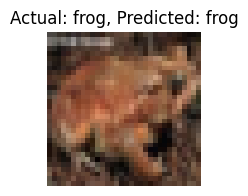

In [ ]:
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


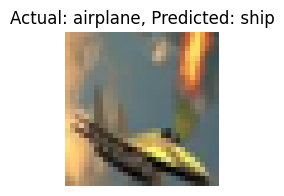

In [ ]:
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


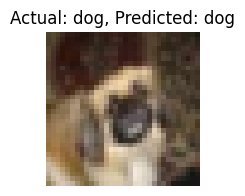

In [ ]:
predict()